In [1]:
import networkx as nx
import numpy as np
from nx_utils import get_x_star, generate_observation_graph, get_node_label
from metropolis import metropolis_algorithm, sample_from_unif
from utils import estimate_quality, visualize_quality, sample_from_flip
from pandas_utils import save_run_data

from houdayer import houdayer_algorithm
from tqdm.notebook import tqdm

In [2]:
# CONSTANTS
d = 3
r = 0.017
N = 100
n_runs = 1
n_iters = 5000

In [3]:
G = generate_observation_graph(d, r, N)

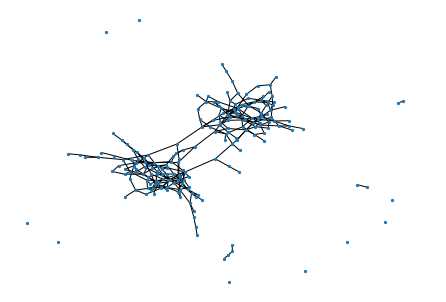

In [4]:
nx.draw(G, node_size=5)

In [5]:
print("Node %d belongs to community %s" % (1, get_node_label(G, 1)))



Node 1 belongs to community -1


Quality of run 0: 0.92
File found, adding the lines to the existent dataset...


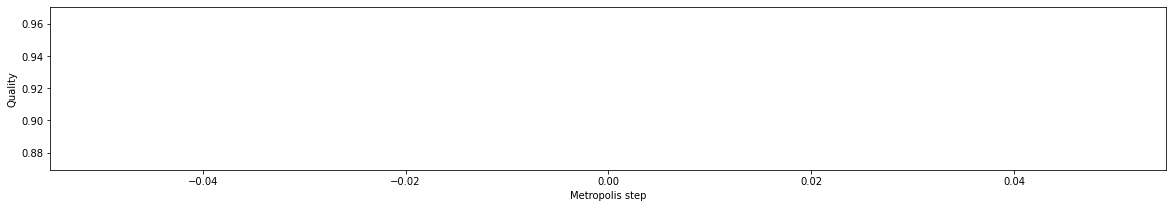

In [6]:

qualities = []
for run in range(n_runs):
    G = generate_observation_graph(d, r, N)
    x_star = get_x_star(G)
    x, run_qualities = metropolis_algorithm(G, d, r, sample_from_flip, n_iters, x_star)
    quality = estimate_quality(x, x_star)
    qualities.append(quality)
    print("Quality of run %d: %.2f" % (run, quality))
    df = save_run_data(file_name = 'prova', algorithm_name = 'metropolis', quality_list = run_qualities, d = d, r = r, N = N, task = 0)